# Importing Library

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os
import re
import nltk
import string
import unicodedata
import pandas as pd

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

import keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Dataset

## Loading Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project/teacher_reviews_student_performance_train.csv")
df.head()

Sentiment    Label
0  Siswa ini menunjukkan peningkatan yang luar bi...  positif
1  Kerja kerasnya membuahkan hasil yang sangat ba...  positif
2  Ia selalu aktif bertanya di kelas dan menunjuk...  positif
3  Presentasinya sangat terstruktur dan penuh per...  positif
4  Tugas yang dikerjakan menunjukkan pemahaman ya...  positif

## Data Visualization and Preprocessing

In [6]:
df.describe()

Sentiment    Label
count                                               10144    10144
unique                                              10043        2
top     Kamu perlu lebih banyak berlatih agar bisa men...  negatif
freq                                                    5     5194

<Axes: xlabel='count', ylabel='Label'>

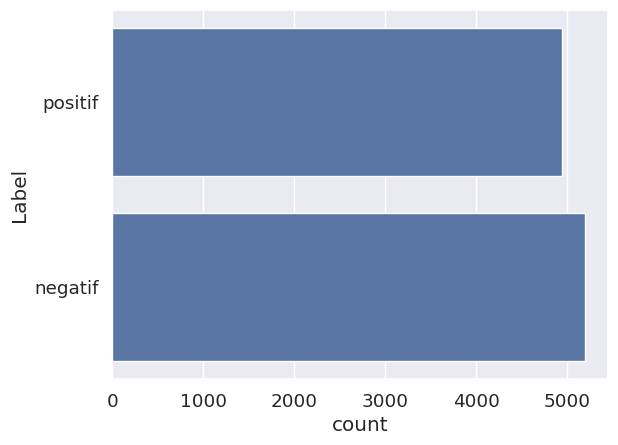

In [7]:
# to known how much "positf" and "negatif" data in dataset
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.Label)

In [8]:
# Checking for any missing values
df.isna().sum()

Sentiment    0
Label        0
dtype: int64

In [9]:
# change label in dataset to index "1" for "positif" and "0" for "negatif"

def label_index(label):
  if label == 'negatif':
    return 0
  elif label == 'positif':
    return 1
  else:
    return label

# Create the 'Label_index' column before applying the function
df['Label_index'] = df['Label'].apply(label_index)

df.head()

Sentiment    Label  Label_index
0  Siswa ini menunjukkan peningkatan yang luar bi...  positif            1
1  Kerja kerasnya membuahkan hasil yang sangat ba...  positif            1
2  Ia selalu aktif bertanya di kelas dan menunjuk...  positif            1
3  Presentasinya sangat terstruktur dan penuh per...  positif            1
4  Tugas yang dikerjakan menunjukkan pemahaman ya...  positif            1

In [10]:
unicode = 1
spl = 1
punctuations = 1
lower_case = 1
stop_words = 1
lemma = 1
stemming = 0

# loading the stopwords defined in nltk library
STOPWORDS = stopwords.words('indonesian')

# initializing the nltk stemmer
ps = PorterStemmer()

# initializing the wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocessing_function(text):

    if unicode == 1:
        # résumé -> resume
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        print("Removing unaccented characters..")

    if spl == 1:
        # removing special and non alpha-numerical characters
        remove_digits = 1
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
        text = re.sub(pattern, '', text)
        print("Removing special and non-alpha-numerical characters..")

    if lower_case == 1:
        # converting to lower case
        text = text.lower().strip()
        print("Performing text normalization..")

    if punctuations == 1:
        # removing all punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        print("Removing all punctuations..")

    if stop_words == 1:
        # removing stop words
        text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
        print("Removing stop words..")

    if stemming == 1:
        # stemming - program, programs, programmer, programming, programmers -> program
        text = " ".join([ps.stem(word) for word in text.split()])
        print("Performing stemming..")

    if lemma == 1:
        # lemmatization - rocks -> rock, corpora -> corpus, better -> good
        text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
        print("Performing lemmatization..")

    return text

In [11]:
# column for sentiment that has been processed
df["Sentiment_proceseed"] = df["Sentiment"].map(preprocessing_function)

Output streaming akan dipotong hingga 5000 baris terakhir.
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text norma

In [12]:
# to drop duplicate data in dataset
df.drop_duplicates(inplace=True)
df

Sentiment    Label  \
0      Siswa ini menunjukkan peningkatan yang luar bi...  positif   
1      Kerja kerasnya membuahkan hasil yang sangat ba...  positif   
2      Ia selalu aktif bertanya di kelas dan menunjuk...  positif   
3      Presentasinya sangat terstruktur dan penuh per...  positif   
4      Tugas yang dikerjakan menunjukkan pemahaman ya...  positif   
...                                                  ...      ...   
10139  Tugas ini masih banyak yang harus diperbaiki, ...  negatif   
10140  Hasil pekerjaan ini kurang memadai, coba kerja...  negatif   
10141  Kamu harus lebih berhati-hati dalam mengerjaka...  negatif   
10142  Pekerjaan ini menunjukkan banyak kekurangan, c...  negatif   
10143  Tugas ini banyak yang harus diperbaiki, coba l...  negatif   

       Label_index                                Sentiment_proceseed  
0                1                       siswa peningkatan matematika  
1                1              kerja kerasnya membuahkan hasil ujian  
2                1                                        aktif kelas  
3                1            presentasinya terstruktur penuh percaya  
4                1                    tugas pemahaman mendalam materi  
...            ...                                                ...  
10139            0     tugas diperbaiki coba kerjakan teliti hatihati  
10140            0  hasil pekerjaan memadai coba kerjakan fokus te...  
10141            0                                  berhatihati tugas  
10142            0   pekerjaan kekurangan coba kerjakan serius teliti  
10143            0            tugas diperbaiki coba berlatih hasilnya  

[10043 rows x 4 columns]

## Processing Data

In [13]:
X = np.array(df['Sentiment_proceseed'])
Y = np.array(pd.get_dummies(df[['Label_index']]))

In [14]:
sentences = X

In [15]:
# Word-vector Size
embed_size = 50

# Unique Words
max_features = 500

# No of words per document
max_len = 350

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(sentences))

list_tokenized_train = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(list_tokenized_train, maxlen = max_len)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print('Shape of Training Data')
print(X_train.shape, Y_train.shape)

print('Shape of Testing Data')
print(X_test.shape, Y_test.shape)

Shape of Training Data
(9038, 350) (9038, 1)
Shape of Testing Data
(1005, 350) (1005, 1)


### Wordcloud For Positive Text

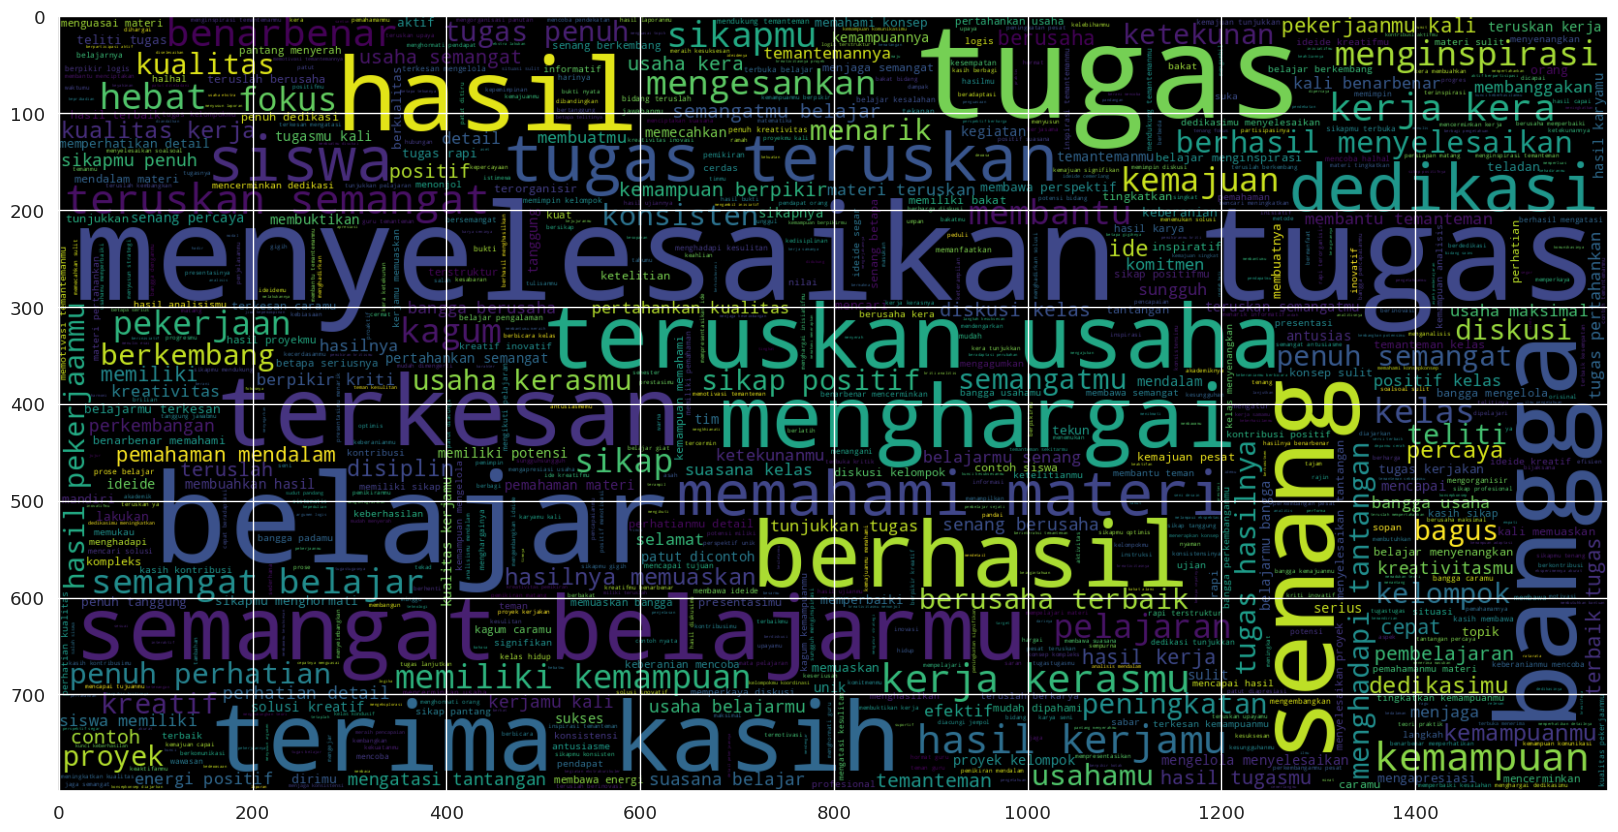

In [16]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label_index == 1].Sentiment_proceseed))
plt.imshow(wc , interpolation = 'bilinear')

### Wordcloud For Negative Text

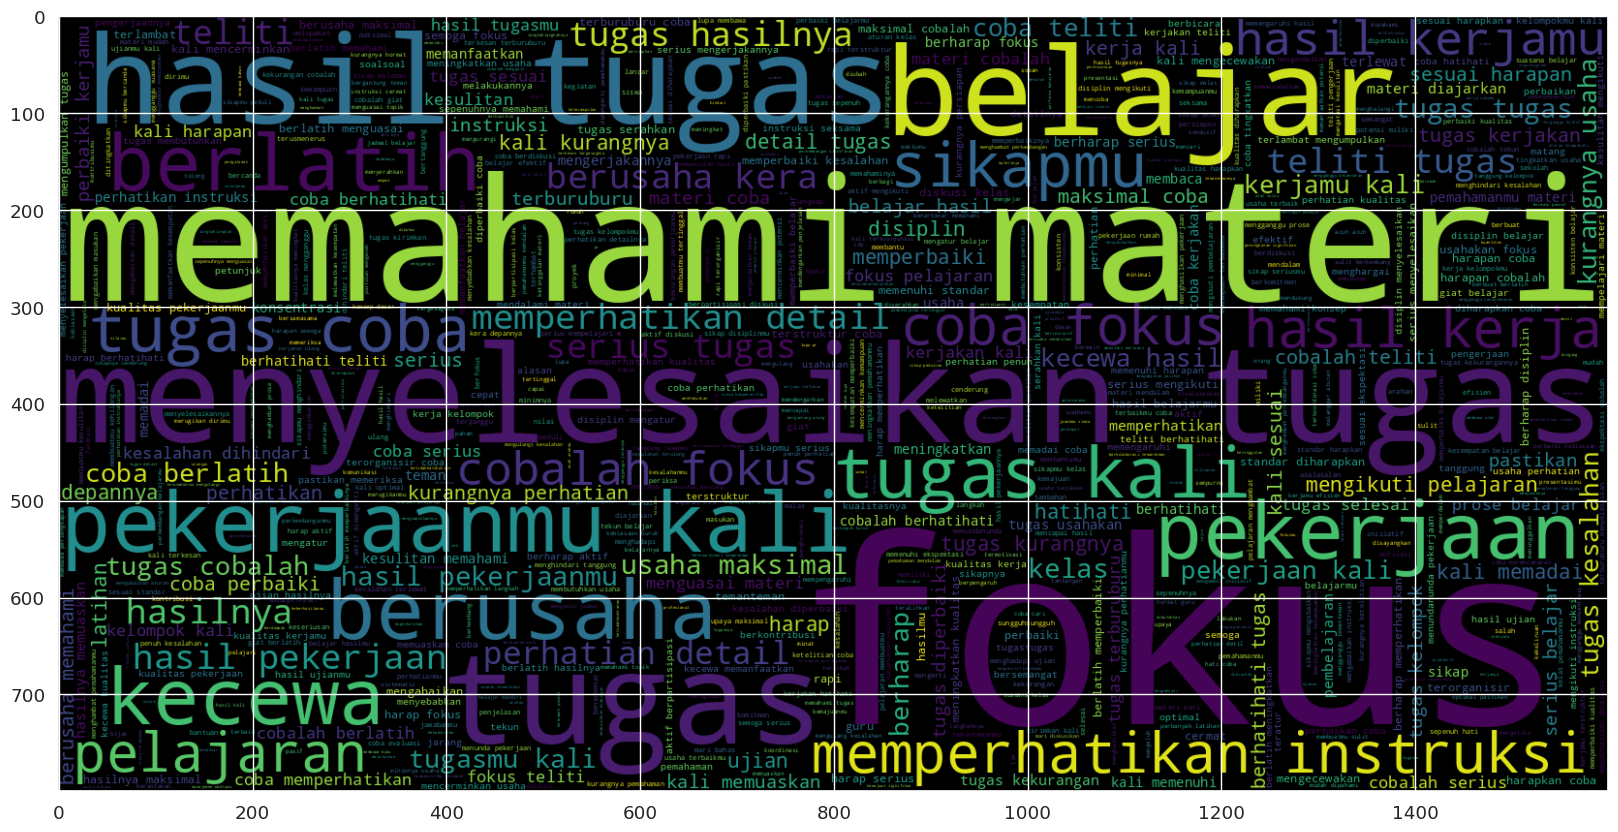

In [17]:
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label_index == 0].Sentiment_proceseed))
plt.imshow(wc , interpolation = 'bilinear')

### Number of Characters in Text

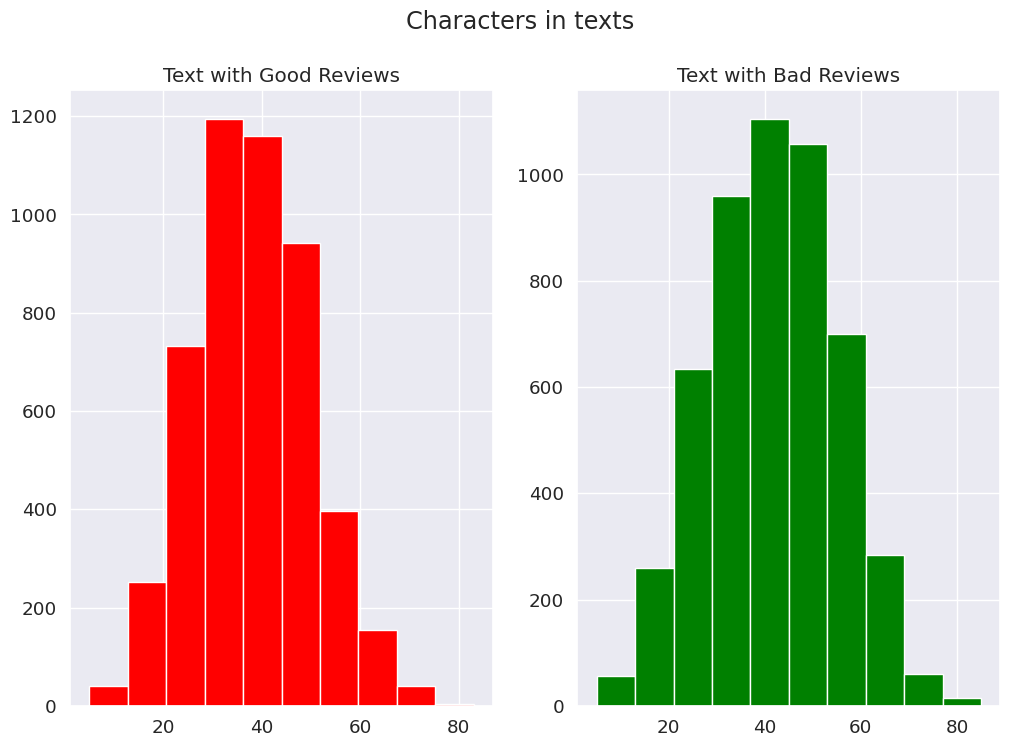

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Label_index']==1]['Sentiment_proceseed'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['Label_index']==0]['Sentiment_proceseed'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

### Number of Words in Each Text

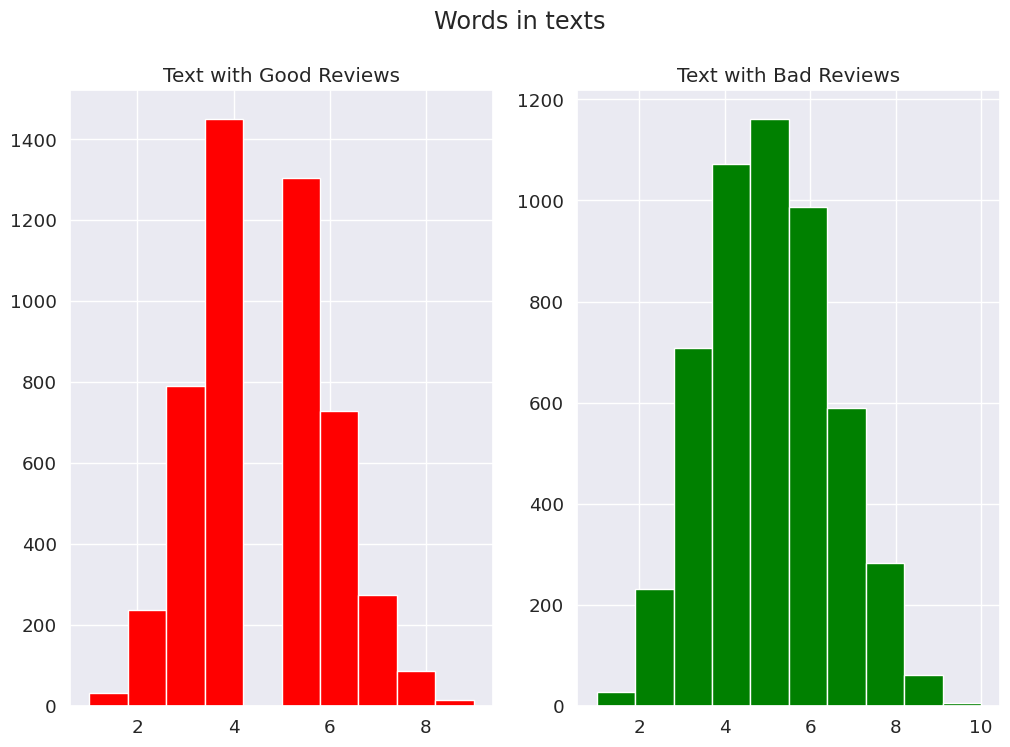

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Label_index']==1]['Sentiment_proceseed'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['Label_index']==0]['Sentiment_proceseed'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

### Average Word Length in a Text

<ipython-input-20-eda0081873b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
<ipython-input-20-eda0081873b3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')


Text(0.5, 0.98, 'Average word length in each text')

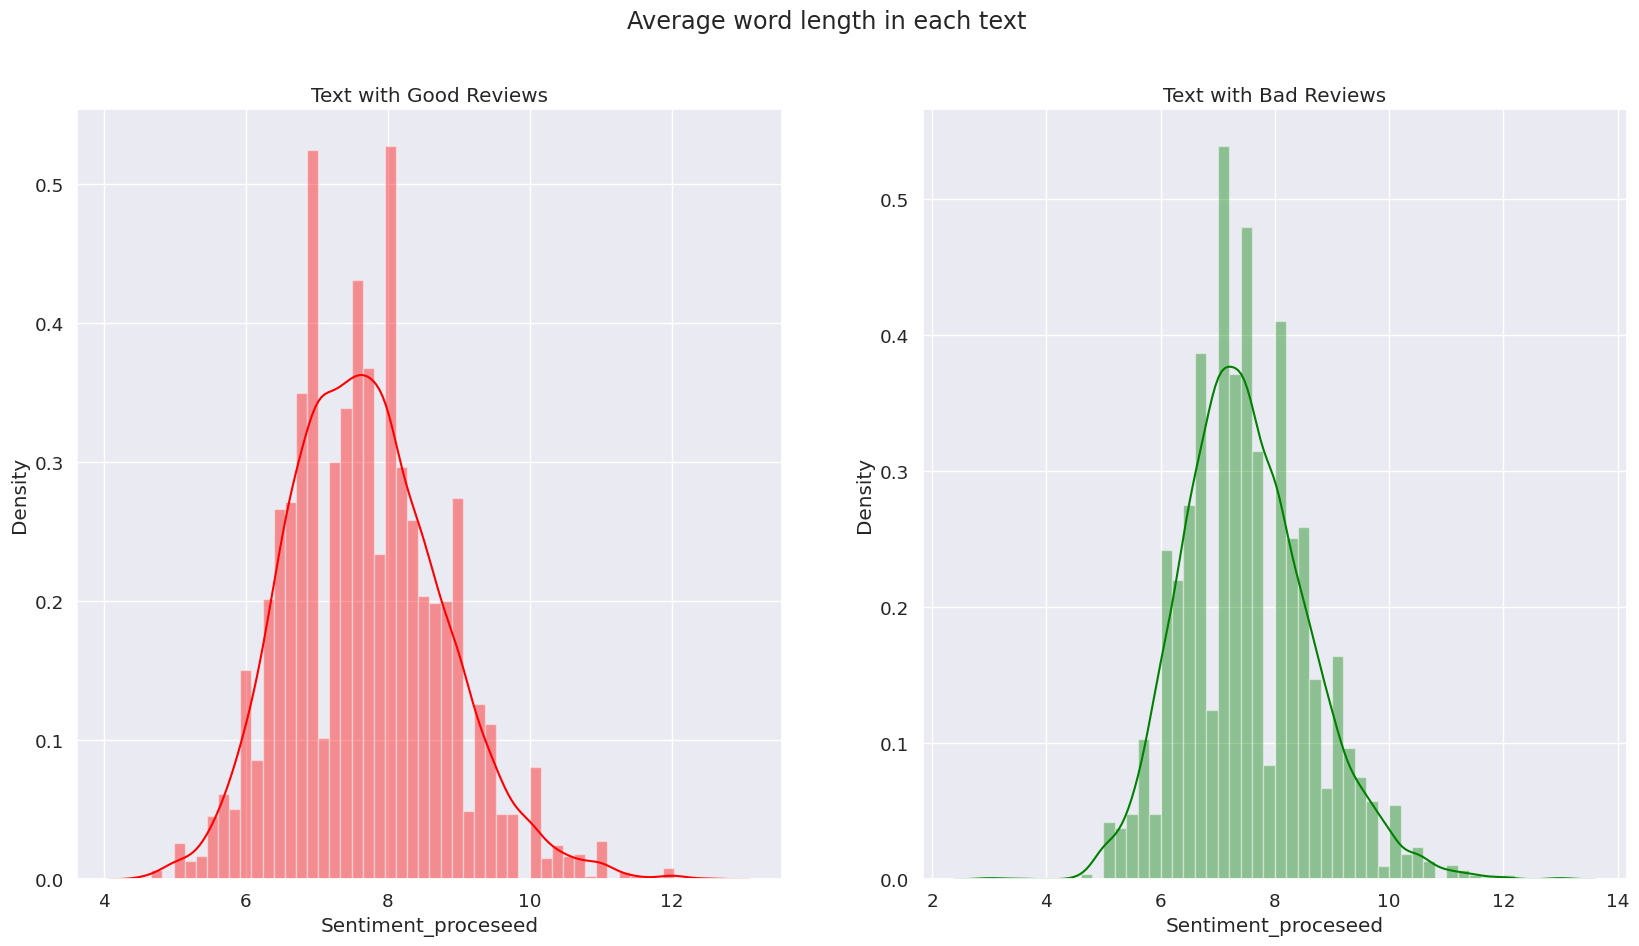

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['Label_index']==1]['Sentiment_proceseed'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=df[df['Label_index']==0]['Sentiment_proceseed'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')

In [21]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Sentiment_proceseed)
corpus[:5]

['siswa', 'peningkatan', 'matematika', 'kerja', 'kerasnya']

In [22]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'tugas': 3542,
 'hasil': 1549,
 'belajar': 1109,
 'kali': 1017,
 'coba': 922,
 'fokus': 879,
 'menyelesaikan': 770,
 'materi': 754,
 'usaha': 741,
 'berusaha': 589}

In [23]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [24]:
most_common_uni = get_top_text_ngrams(df.Sentiment_proceseed,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [25]:
most_common_bi = get_top_text_ngrams(df.Sentiment_proceseed,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [26]:
most_common_tri = get_top_text_ngrams(df.Sentiment_proceseed,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### Defined Embeddings

In [27]:
GLOVE_FILE = "/content/drive/MyDrive/Capstone Project/glove_50dim_wiki.id.case.text.txt"

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = 'float32')

embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(GLOVE_FILE, encoding = 'utf-8'))

In [28]:
all_embs = np.hstack([v for v in embeddings_index.values()])
emb_mean, emb_std = all_embs.mean(), all_embs.std()

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

In [29]:
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Modelling

In [30]:
inp = Input(shape = (max_len,))
x = Embedding(max_features, embed_size, weights = [embedding_matrix])(inp)
x = Bidirectional(LSTM(64, return_sequences = True, recurrent_dropout = 0.4))(x)
x = GlobalMaxPool1D()(x)
x = Dense(32, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = x)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 350)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 350, 50)             │          25,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 350, 128)            │          58,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,041 (343.91 KB)

 Trainable params: 88,041 (343.91 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [31]:
epochs = 30
batch_size = 128

checkpoint = ModelCheckpoint('Sentiment.keras', save_best_only = True, monitor = 'val_loss', mode = 'min', verbose = 1)
# early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, mode = 'min', verbose = 1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, min_delta = 0.001, mode = 'min', verbose = 1)

history = model.fit(X_train, Y_train,
                    epochs = epochs, batch_size = batch_size,
                    validation_split = 0.35,
                    callbacks = [checkpoint])

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5845 - loss: 0.6675
Epoch 1: val_loss improved from inf to 0.46168, saving model to Sentiment.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5862 - loss: 0.6665 - val_accuracy: 0.8243 - val_loss: 0.4617
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8335 - loss: 0.4093
Epoch 2: val_loss improved from 0.46168 to 0.22134, saving model to Sentiment.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8342 - loss: 0.4080 - val_accuracy: 0.9061 - val_loss: 0.2213
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9118 - loss: 0.2297
Epoch 3: val_loss improved from 0.22134 to 0.18423, saving model to Sentiment.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9119 - loss: 0.2294 - val_accuracy: 0.9257 - val_loss: 0.1842
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9413 - loss: 0.1807
Epoch 4: val_loss improved from 0.18423 to 0.13800, saving model to Sentime

## Evaluate Model

In [32]:
model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step


array([[7.7765135e-06],
       [9.9999750e-01],
       [1.0000000e+00],
       ...,
       [1.6967881e-06],
       [9.9999976e-01],
       [6.2214095e-02]], dtype=float32)

In [33]:
test_df = pd.read_csv("/content/drive/MyDrive/Capstone Project/teacher_review_performance_students_test.csv")

In [34]:
test_df["processed_Sentiment"] = df["Sentiment"].map(preprocessing_function)
test_df

Output streaming akan dipotong hingga 5000 baris terakhir.
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text norma

Sentiment  Label  \
0    "Siswa ini selalu menunjukkan semangat belajar...      1   
1    "Ia mampu menyelesaikan tugas dengan sangat ba...      1   
2    "Sikapnya yang aktif di kelas sangat membantu ...      1   
3    "Ia memiliki kemampuan berpikir kritis yang lu...      1   
4    "Prestasinya dalam mata pelajaran ini terus me...      1   
..                                                 ...    ...   
195  "Ia sering meninggalkan tugas sekolah tanpa di...      0   
196  "Kemampuannya memahami konsep-konsep dasar mas...      0   
197  "Ia menunjukkan sedikit usaha untuk memperbaik...      0   
198  "Hasil ujiannya mencerminkan kurangnya fokus d...      0   
199  "Ia sering lupa mengerjakan pekerjaan rumah."          0   

                                   processed_Sentiment  
0                         siswa peningkatan matematika  
1                kerja kerasnya membuahkan hasil ujian  
2                                          aktif kelas  
3              presentasinya terstruktur penuh percaya  
4                      tugas pemahaman mendalam materi  
..                                                 ...  
195                         mengelola menghadapi tugas  
196  sikapnya menghormati guru teman membuatnya tel...  
197      kemampuannya membaca memahami materi menonjol  
198                                   memiliki belajar  
199        hasil tulisannya berkualitas sesuai panduan  

[200 rows x 3 columns]

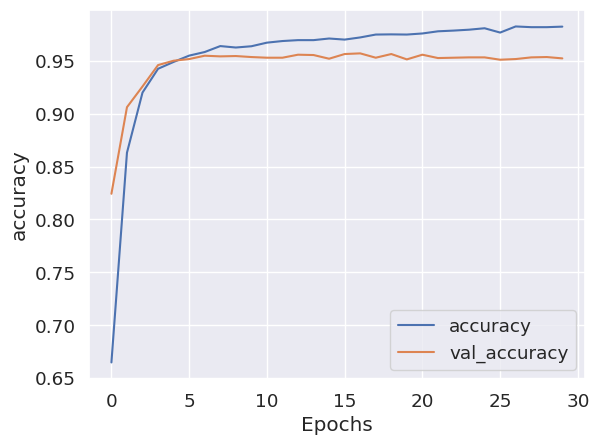

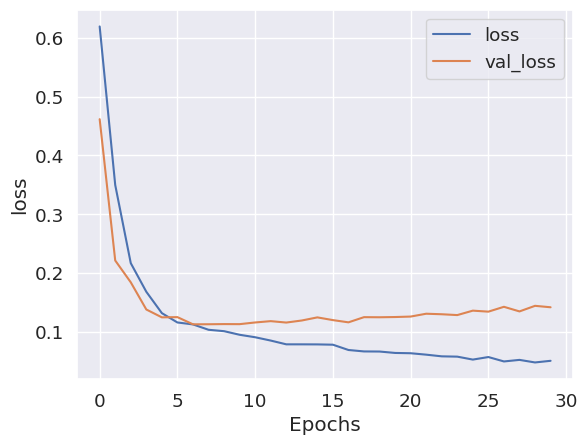

In [35]:
# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# One Example to test the Model

In [36]:
# fumction to predict model that will generate ouput 1 or 0 based on model prediction
def new_predict(text):

    new_text = [text]
    seq = tokenizer.texts_to_sequences(new_text)
    padded = pad_sequences(seq, maxlen = 350)

    pred = model.predict(padded)

    if pred[0][0] > 0.5:
        return 1
    else:
        return 0

In [37]:
test_df["Label"] = test_df["processed_Sentiment"].map(new_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━

In [38]:
# for example
Sentiment = input("Contoh Komentar Guru: ")

predicted_performance = new_predict(Sentiment)
print(f"Prediksi label index dari Sentiment: {predicted_performance}")

Contoh Komentar Guru: Siswa tidak memahami materi yang diajarkan di kelas
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediksi label index dari Sentiment: 0


# Save Model

In [39]:
# prompt: buatkan save model

model.save('teacher_sentiment_analysis_fix_model.h5')